In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#.Definicão da função de correção de area
#.(calcula a parte da area de um círculo que esta fora das bordas da imagem)
def area_cor( radata, dedata, ap ):

    cosd = np.cos(dedata*np.pi/180.0)
    rarg = [min(radata),max(radata)]
    derg = [min(dedata),max(dedata)]
    
    b = np.array([(rarg[1]-radata)*cosd, (radata-rarg[0])*cosd, ap])
    c = np.array([ derg[1]-dedata, dedata-derg[0], ap ])
    b = np.min(b,axis=0)  ;  c = np.min(c,axis=0)
    P = 0.5*np.pi*ap**2 - c*np.sqrt(ap**2-c**2) - np.arcsin(c/ap)*ap**2
    Q = 0.5*np.pi*ap**2 - b*np.sqrt(ap**2-b**2) - np.arcsin(b/ap)*ap**2
    O = 0.5*( -c*np.sqrt(ap**2-c**2) - b*np.sqrt(ap**2-b**2) + \
     np.arccos(c/ap)*ap**2 - np.arcsin(b/ap)*ap**2) + c*b
    O = O*(abs(b) < np.sqrt(ap**2-c**2))
    area_cor = -P -Q +O
    return area_cor

In [3]:
#.Funçãp para plotar uma carta celeste com cores de acordo com a densidade

import matplotlib.pyplot as plt
font_properties = { 'family' : 'sans serif',
                    'weight' : 'normal',
                    'size'   : 15 } 
plt.rc('font', **font_properties)

import matplotlib.cm as cm
cor = cm.get_cmap('jet')
def plot_chart(radata,dedata,size,colordata = None, cb_title=None):
    fig = plt.figure(figsize = (13,10))
    ax1 = fig.add_subplot(3,3, (1,5))
    ax2 = fig.add_subplot(3,3, (3,6))
    ax3 = fig.add_subplot(3,3, (7,8))
    plt.subplots_adjust(wspace = 0, hspace = 0)
    scatter = ax1.scatter(radata,dedata, s = (max(size)-size)*20, c=colordata, cmap = cor, alpha = 0.8)
    ax1.set_ylabel('DEC (deg)', fontsize = 18, fontweight = 'bold')
    ax1.set_xlim(max(radata),min(radata))
    ax1.set_ylim(min(dedata),max(dedata))
    ax1.set_xticklabels([])
    
    ax2.scatter(colordata,dedata, s = (max(size)-size)*20, c=colordata, cmap = cor, alpha = 0.8)
    ax2.set_xlabel(cb_title, fontsize = 18, fontweight = 'bold')
    ax2.set_ylim(min(dedata),max(dedata))
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax2.set_yticks([])
    ax2.set_xticks([])
    
    ax3.scatter(radata, colordata, s = (max(size)-size)*20, c=colordata, cmap = cor, alpha = 0.8)
    ax3.set_ylabel('RA (deg)', fontsize = 18, fontweight = 'bold')
    ax3.set_ylabel(cb_title, fontsize = 18, fontweight = 'bold')
    ax3.set_xlim(max(radata),min(radata))
    ax3.set_yticks([])
    ax3.set_yticklabels([])
    cbar = fig.colorbar(scatter, ax = [ax1,ax2,ax3])
    cbar.set_label(cb_title,fontsize=16,fontweight='bold')    
    return fig, [ax1, ax2, ax3]

In [4]:
data = pd.read_csv('final_semradec.csv')
data.rename(columns = {'ra':'RA', 'dec':'DEC', 'phot_g_mean_mag':'Gmag'}, inplace = True)
data

,source_id,RA,DEC,pmra,pmra_error,pmdec,pmdec_error,bp_rp,Gmag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b,labels
0,673241243249810048,114.633406,21.399736,-1.231976,0.143277,-2.001790,0.117381,1.256395,17.915829,0.395416,0.124311,NaN,NaN,198.291700,19.600414,0
1,673241311969289088,114.655986,21.401323,-1.208182,0.078424,-2.135010,0.063937,0.859423,16.993780,0.320099,0.068997,NaN,NaN,198.298628,19.620461,0
2,673241655566707968,114.725559,21.431311,-1.238170,0.099802,-2.083251,0.085784,0.949079,17.272697,0.336681,0.086309,NaN,NaN,198.295310,19.691767,0
3,673241797301815680,114.671622,21.432996,-1.207817,0.052584,-1.982167,0.045646,0.689917,15.977357,0.355125,0.044247,NaN,NaN,198.273399,19.645964,0
4,673243201754958848,114.763220,21.450627,-1.313063,0.061598,-1.935306,0.051210,0.779943,16.504190,0.356277,0.056110,NaN,NaN,198.290466,19.731531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,865415985792801536,114.448521,21.695498,-1.245144,0.062337,-2.092060,0.051715,0.761868,16.531712,0.341380,0.058506,NaN,NaN,197.931989,19.553702,0
363,865416432469352576,114.550988,21.740868,-1.210706,0.048776,-2.027882,0.041733,0.709500,16.124363,0.384797,0.046865,NaN,NaN,197.925736,19.658990,0
364,865421307255323776,114.609902,21.733006,-1.203099,0.027990,-2.005187,0.021982,0.585298,14.647121,0.320163,0.025267,NaN,NaN,197.955477,19.706661,0
365,865421311552192384,114.603215,21.733000,-1.174638,0.055649,-2.055486,0.049026,0.709509,16.105198,0.355643,0.051139,NaN,NaN,197.952984,19.700909,0


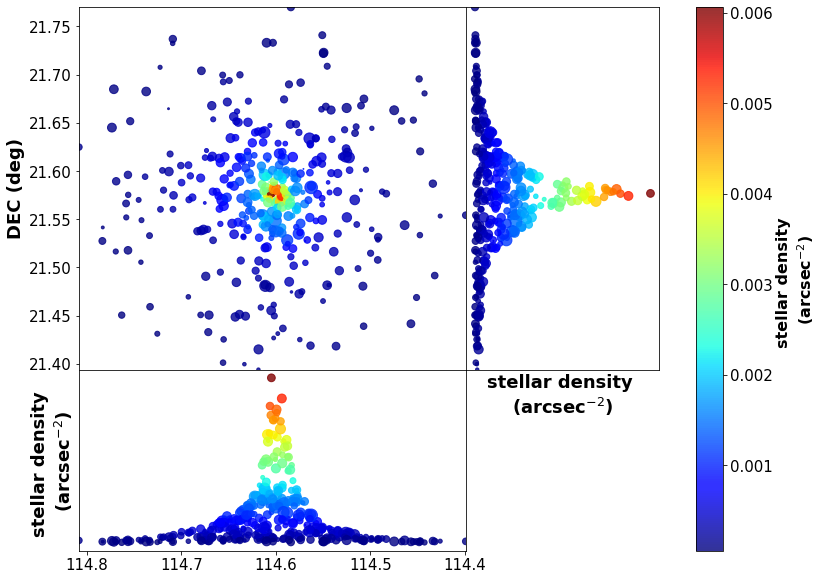

In [5]:
#=====================================================================================
#.Calculando a densidade observada de estrelas
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors

nstar = len(data)

#.Criando um catalogo com as coordenadas RA e DEC das estrelas
catalog = SkyCoord(ra=data.RA*units.degree, dec=data.DEC*units.degree, frame='fk5')

#.Definindo o vizinho apropriado para a abertura
k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([data.RA*np.cos(data.DEC*np.pi/180.0), data.DEC]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2 + area_cor(data.RA, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

fig, axes= plot_chart(data.RA, data.DEC, data.Gmag, colordata=(den_data), 
                         cb_title='stellar density \n(arcsec$^{-2}$)')

In [6]:
def king3( r, kpars ):
    
    k, Rc, Rt, bg = kpars

    # inicializando vetores
    r = np.array(r, dtype=np.float32)
    p = np.full(len(r), bg, dtype=np.float32)

    # calculando densidade para r < Rt (depois de Rt, p = bg)
    w = (r < Rt)      
    p[w] += k*( 1.0/np.sqrt(1.0 + (r[w]/Rc)**2) - \
                1.0/np.sqrt(1.0 + (Rt/Rc)**2) )**2
    return p;

In [7]:
#.estimativa do centro em RA
med_x = np.average(data.RA, weights=den_data)
std_x = np.average((data.RA-med_x)**2, weights=den_data)**0.5

#.estimativa do centro em DEC
med_y = np.average(data.DEC, weights=den_data)
std_y = np.average((data.DEC-med_y)**2, weights=den_data)**0.5

#.estimativa do valor de bg
norm_den = den_data/np.max(den_data)
bg_select = (norm_den > 0) & (norm_den < 0.1)
med_bg = np.median(den_data[bg_select])
std_bg = 0.5*med_bg

#.estimativa do valor de k
norm_den = (den_data-med_bg)/np.max(den_data-med_bg)
k_select = (norm_den > 0.95)
med_k = np.median(den_data[k_select])
std_k = 0.5*med_k

#.estimativa do valor do raio do core
rc_select = (norm_den > 0.4) & (norm_den < 0.6)
med_rc = np.max(data[rc_select].DEC-med_y)*3600
std_rc = med_rc

#.estimativa do valor do raio de mare
med_rt = 10*med_rc
std_rt = med_rt

par0 = np.array([med_x, med_y, med_k, med_rc, med_rt, med_bg])
std0 = np.array([std_x, std_y, std_k, std_rc, std_rt, std_bg])

In [8]:
par0,std0

(array([1.14603347e+02, 2.15754042e+01, 6.06018844e-03, 4.91590642e+01,
        4.91590642e+02, 2.20183244e-04]),
 array([3.30015394e-02, 3.25986544e-02, 3.03009422e-03, 4.91590642e+01,
        4.91590642e+02, 1.10091622e-04]))

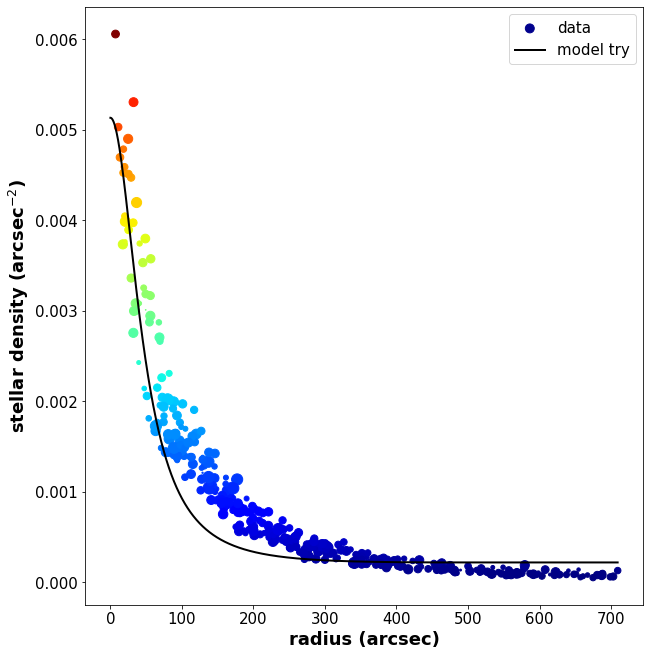

In [9]:
center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP
fig, ax = plt.subplots(1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(data.Gmag)-data.Gmag)*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')

#.sobrepondo um modelo de King
kpars = par0[2:]
king_rad = np.arange(0,np.max(radii),0.1)
king_den = king3(king_rad, kpars)
ax.plot(king_rad, king3(king_rad, kpars), color='black', lw=2, label='model try')

ax.legend();

In [10]:
kpars

array([6.06018844e-03, 4.91590642e+01, 4.91590642e+02, 2.20183244e-04])

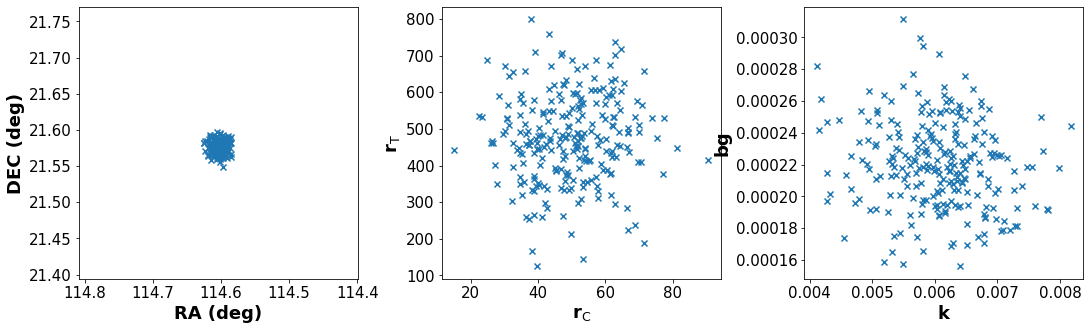

In [19]:
#.configurando parametros da cadeia
npar, nwalk, nstep = 6, 250, 5000

#.limites sobre os parametros: (RAc, DECc, k, rc, rt, bg)
minw = np.array([np.min(data.RA), np.min(data.DEC), np.min(den_data), 1, 10, 0])
maxw = np.array([np.max(data.RA), np.max(data.DEC), 2*np.max(den_data), 100, 1000, np.max(den_data)])

#.distribuindo walkers entre os minimos e maximos (uniforme)
#wlk0 = minw + (maxw-minw)*np.random.rand(nwalk,npar)

#.distribuindo walkers em torno dos valores iniciais (normal)
wlk0 = par0 + 0.25*std0*np.random.randn(nwalk,npar)

#.aplicando os limites maximo e minimo
wlk0.clip(min=minw, max=maxw, out=wlk0)

#.visualizando distribuicao inicial walkers
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(18,5))
plt.subplots_adjust(wspace=0.3)

ax1.scatter(wlk0[:,0], wlk0[:,1], marker='x')
ax1.set_xlabel('RA (deg)', fontweight='bold', fontsize=18)
ax1.set_ylabel('DEC (deg)', fontweight='bold', fontsize=18)
ax1.set_xlim((max(data.RA), min(data.RA)))
ax1.set_ylim((min(data.DEC), max(data.DEC)))

ax2.scatter(wlk0[:,3], wlk0[:,4], marker='x')
ax2.set_xlabel('r$_\mathrm{C}$', fontweight='bold', fontsize=18)
ax2.set_ylabel('r$_\mathrm{T}$', fontweight='bold', fontsize=18);

ax3.scatter(wlk0[:,2], wlk0[:,5], marker='x')
ax3.set_xlabel('k', fontweight='bold', fontsize=18)
ax3.set_ylabel('bg', fontweight='bold', fontsize=18);

In [20]:
def loglike( walker ):
    center = SkyCoord(walker[0]*units.degree, walker[1]*units.degree, frame='fk5')
    rad = center.separation(catalog).to(units.arcsec).value
    den_model = king3(rad, walker[2:])
    chi = (den_data-den_model)/(den_sigm)
    return -0.5*chi**2

def logprior( walker ):
  good_par = (walker > minw) & (walker < maxw)
  if np.all(good_par): 
    return -0.5*(((par0-walker)/std0)**2)
    #return np.zeros(npar)
  else: return -np.inf

def logpost( walker ):
  prior = np.sum(logprior(walker))
  if np.isfinite(prior):
    return prior + np.sum(loglike(walker))
  else: return -np.inf

import emcee

#import concurrent.futures
#with concurrent.futures.ProcessPoolExecutor(mp_context=mp.get_context('fork')) as pool:
  #sampler = emcee.EnsembleSampler( nwalk, npar, logpost, pool=pool )
#            moves=[(emcee.moves.DEMove(), 0.8), (emcee.moves.StretchMove(), 0.2)] )
  #sampler.run_mcmc(wlk0, nstep, progress=True)

In [21]:
# SuperFastPython.com
# example of checking changing the start method used in the process pool
from multiprocessing.pool import Pool
from multiprocessing import get_start_method
from multiprocessing import get_context

# task executed in a worker process
def task():
    # get the start method
    method = get_start_method()
    # report a message
    print(f'Worker using {method}', flush=True)

# protect the entry point
if __name__ == '__main__':
    # get the start method
    method = get_start_method()
    print(f'Main process using {method}')
    # create a process context
    ctx = get_context('fork')
    # create and configure the process pool
    with Pool(context=ctx) as pool:
        sampler = emcee.EnsembleSampler( nwalk, npar, logpost, pool=pool )
#            moves=[(emcee.moves.DEMove(), 0.8), (emcee.moves.StretchMove(), 0.2)] )
        sampler.run_mcmc(wlk0, nstep, progress=True)

Main process using spawn


100%|██████████| 5000/5000 [02:15<00:00, 36.78it/s]


Text(0.5, 0, 'steps')

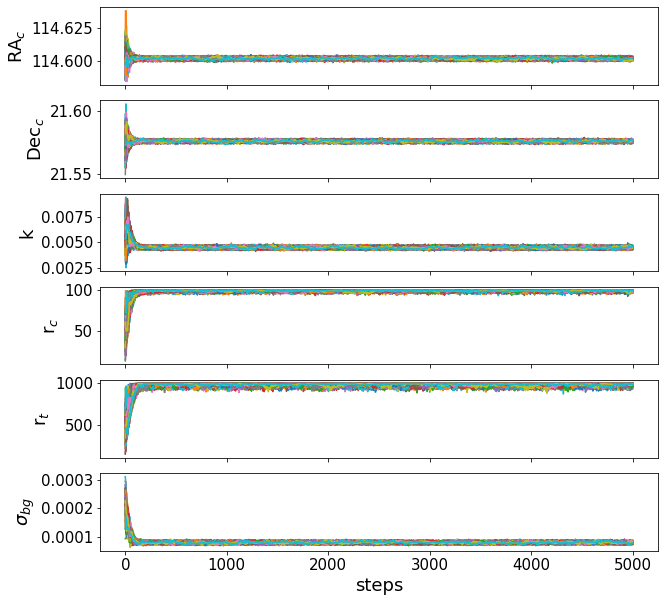

In [22]:
#..labels e unidades dos parametros
labels = ["RA$_c$", "Dec$_{c}$", "k", "r$_c$", "r$_t$", "$\sigma_{bg}$"]
units = ["deg", "deg", "arcsec$^{-2}$", "arcsec", "arcsec", "arcsec$^{-2}$"]

#.construindo o tracer plot
fig, axes = plt.subplots(npar, 1, sharex=True, figsize=(10,10) )
for i in range(npar):
    axes[i].plot(np.array(sampler.chain[:,:,i]).T,rasterized=True)
    axes[i].set_ylabel(labels[i], fontsize=18)
axes[npar-1].set_xlabel(r'steps', fontsize=18)

In [23]:
#..obtendo tempo de correlaçao dos parametros
tau = sampler.get_autocorr_time(tol=0)
#print(tau)

#..determinando estados iniciais (burn-in) e estados correlacionados (thinning)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

#..obtendo taxa de aceitação dos walkers
acc = sampler.acceptance_fraction
#print(acc)

#..determinando walkers "perdidos"
good_walker = (abs(acc-np.median(acc)) < 3*np.std(acc))

#..selecionando apenas estados estacionarios não correlacionados
states = sampler.chain[good_walker,burnin::thin,:].copy()
np.shape(states)

#..redimensionando a cadeia
nwlk, nthin, _ = np.shape(states)
states = np.reshape(states,[nwlk*nthin, npar])
np.shape(states)

#.obtendo valores mais provaveis dos parametros
quantiles = np.quantile(states,[0.16,0.50,0.84],axis=0)

pars_best = quantiles[1,:]
perr_low  = quantiles[0,:]-pars_best
perr_high = quantiles[2,:]-pars_best

print(pars_best)
#print(perr_low)
#print(perr_high)

[1.14602053e+02 2.15759026e+01 4.45976093e-03 9.95296889e+01
 9.91233202e+02 8.01421361e-05]


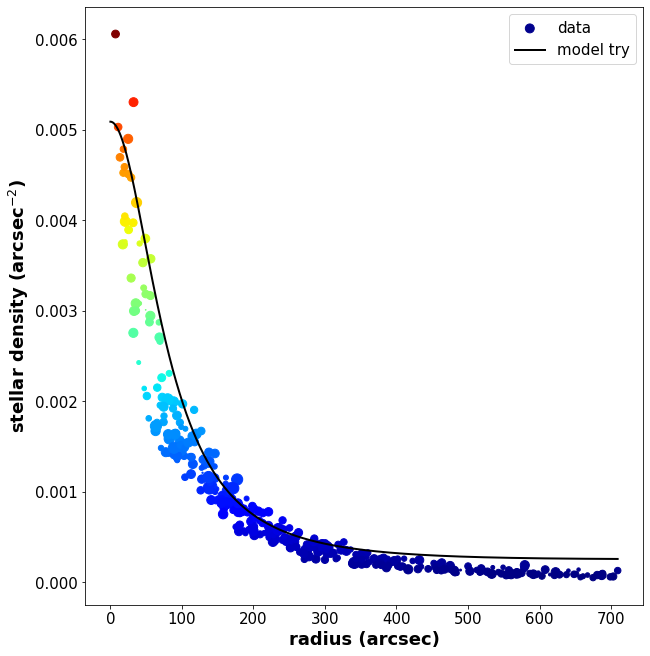

In [24]:
from astropy.coordinates import SkyCoord
from astropy import units

centro = SkyCoord(ra=pars_best[0]*units.degree, dec=pars_best[1]*units.degree, frame='fk5')
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP
fig, ax = plt.subplots(1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(data.Gmag)-data.Gmag)*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')

#.sobrepondo um modelo de King
kpars = pars_best[2:]
kpars = np.array([5.96392474e-03, 8.36617543e+01, 8.35196021e+02, 2.56930342e-04])
king_rad = np.arange(0,np.max(radii),0.1)
king_den = king3(king_rad, kpars)
ax.plot(king_rad, king3(king_rad, kpars), color='black', lw=2, label='model try')

ax.legend();

In [25]:
kpars = np.array([5.96392474e-03, 8.36617543e+01, 8.35196021e+02, 2.56930342e-04])

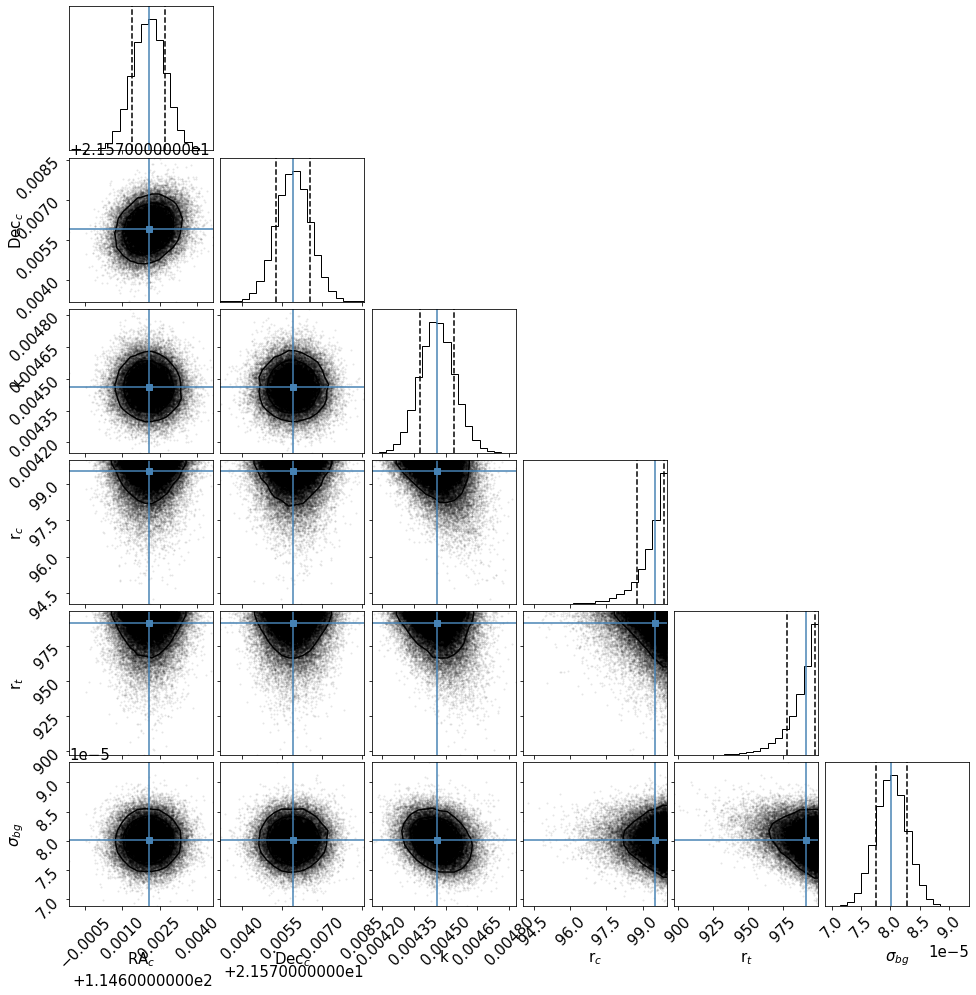

In [26]:
import corner
fig = corner.corner(states, labels=labels, truths=pars_best, \
 quantiles=[0.16,0.84], scale_hist=False, hist_bins='scott', density=True,\
 plot_density=False, plot_contours=True, no_fill_contours=True, \
 hist2d_plot_datapoints=True, hist2d_data_alpha=0.75)